#**PROYECTO MÉTODOS (PCA)**

**DataSet Elegido:** Tesla Deliveries

**Resumen:** El dataset contiene información sobre las entregas, producción y características técnicas de vehículos Tesla en diferentes regiones del mundo, durante los años 2015 a 2025. Incluye datos por modelo, región, unidades producidas y entregadas, precios promedio, capacidad de batería, autonomía, CO₂ ahorrado y número de estaciones de carga, permitiendo analizar la evolución, eficiencia y expansión de Tesla en el mercado eléctrico global.

#**Analisis Exploratorio de Datos (EDA)**

## **1. Configuración y Carga de Datos**
Importamos las librerías necesarias y cargamos el dataset. Se realiza una inspección inicial para asegurar que los datos se leyeron correctamente y configurar el estilo visual de las gráficas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset
df = pd.read_csv('tesla_deliveries_dataset_2015_2025.csv')

# Vista rápida
print(f"Dimensiones del dataset: {df.shape}")
print(df.head())

Dimensiones del dataset: (2640, 12)
   Year  Month         Region    Model  Estimated_Deliveries  \
0  2023      5         Europe  Model S                 17646   
1  2015      2           Asia  Model X                  3797   
2  2019      1  North America  Model X                  8411   
3  2021      2  North America  Model 3                  6555   
4  2016     12    Middle East  Model Y                 12374   

   Production_Units  Avg_Price_USD  Battery_Capacity_kWh  Range_km  \
0             17922       92874.27                   120       704   
1              4164       62205.65                    75       438   
2              9189      117887.32                    82       480   
3              7311       89294.91                   120       712   
4             13537      114846.78                   120       661   

   CO2_Saved_tons           Source_Type  Charging_Stations  
0         1863.42  Interpolated (Month)              12207  
1          249.46    Official (Quart

## **2. Análisis Temporal: Evolución de Entregas**
Agrupamos las entregas estimadas por año para visualizar la tendencia de crecimiento de la compañía.


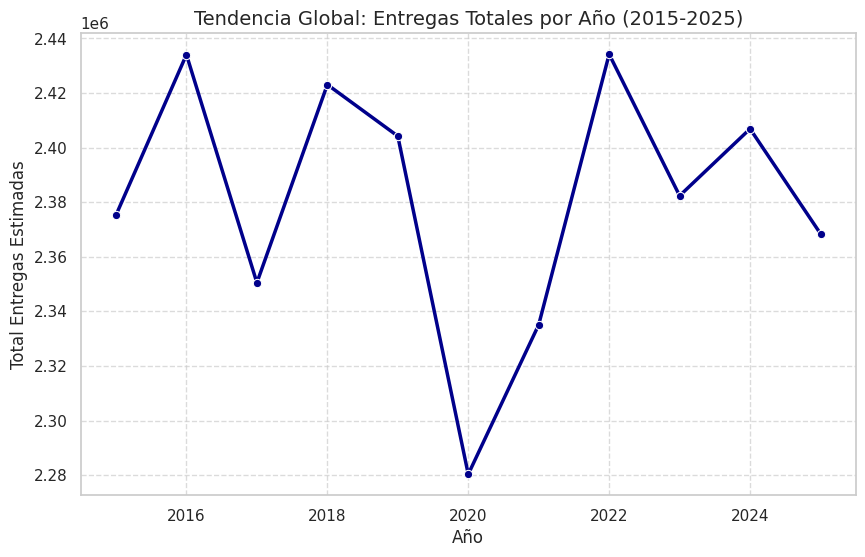

In [ ]:
# Agrupar entregas por año
yearly_deliveries = df.groupby('Year')['Estimated_Deliveries'].sum().reset_index()

plt.figure()
sns.lineplot(data=yearly_deliveries, x='Year', y='Estimated_Deliveries',
             marker='o', linewidth=2.5, color='darkblue')
plt.title('Tendencia Global: Entregas Totales por Año (2015-2025)', fontsize=14)
plt.ylabel('Total Entregas Estimadas')
plt.xlabel('Año')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **3. Análisis de Producto: Distribución por Modelo**
Utilizamos diagramas de caja (Boxplots) para analizar la distribución de las entregas mensuales de cada modelo.
* **Objetivo:** Identificar qué modelos manejan mayor volumen y cómo varía su venta mes a mes.


/tmp/ipython-input-2299858623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Model', y='Estimated_Deliveries', palette='Set2')


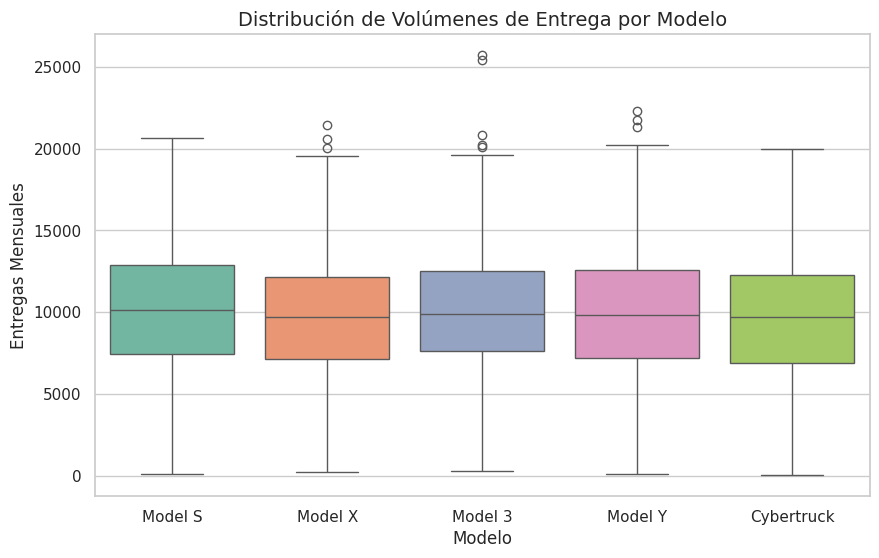

In [ ]:
plt.figure()
sns.boxplot(data=df, x='Model', y='Estimated_Deliveries', palette='Set2')
plt.title('Distribución de Volúmenes de Entrega por Modelo', fontsize=14)
plt.ylabel('Entregas Mensuales')
plt.xlabel('Modelo')
plt.show()

## **4. Análisis Geográfico: Participación de Mercado**
Sumamos el total de entregas por región para identificar los mercados principales.
* **Objetivo:** Determinar qué región (Norteamérica, Europa, Asia, etc.) representa el mayor volumen acumulado para la compañía.

/tmp/ipython-input-3278599541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_deliveries, x='Estimated_Deliveries', y='Region', palette='viridis')


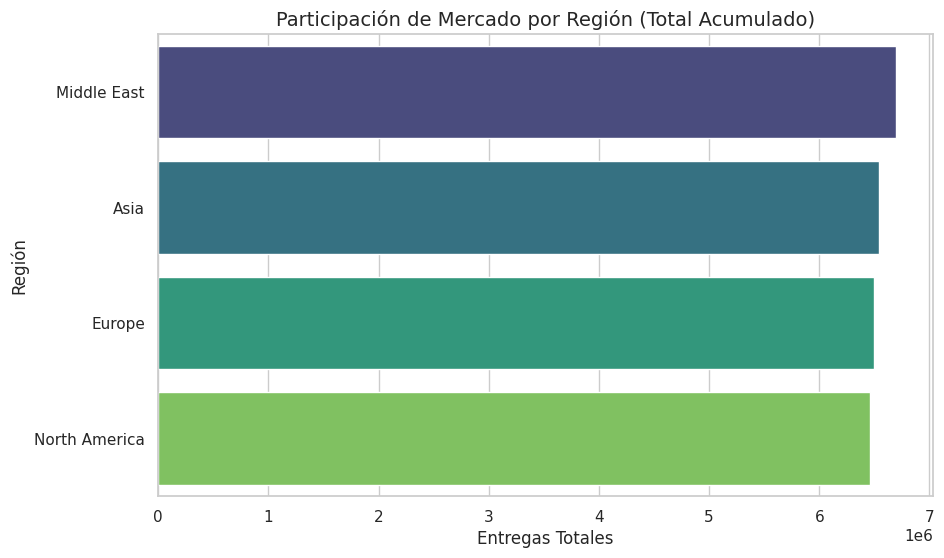

In [ ]:
# Total acumulado por región
region_deliveries = df.groupby('Region')['Estimated_Deliveries'].sum().reset_index().sort_values('Estimated_Deliveries', ascending=False)

plt.figure()
sns.barplot(data=region_deliveries, x='Estimated_Deliveries', y='Region', palette='viridis')
plt.title('Participación de Mercado por Región (Total Acumulado)', fontsize=14)
plt.xlabel('Entregas Totales')
plt.ylabel('Región')
plt.show()

## **5. Segmentación: Precio vs. Autonomía**
Cruzamos el precio promedio (`Avg_Price_USD`) con el rango en kilómetros (`Range_km`), coloreando por modelo para ver si esto revela la segmentación del mercado. Podemos ver si el precio aumenta linealmente con la autonomía o si existen saltos de precio justificados por "lujo" (diferencia entre Model 3/Y y Model S/X).

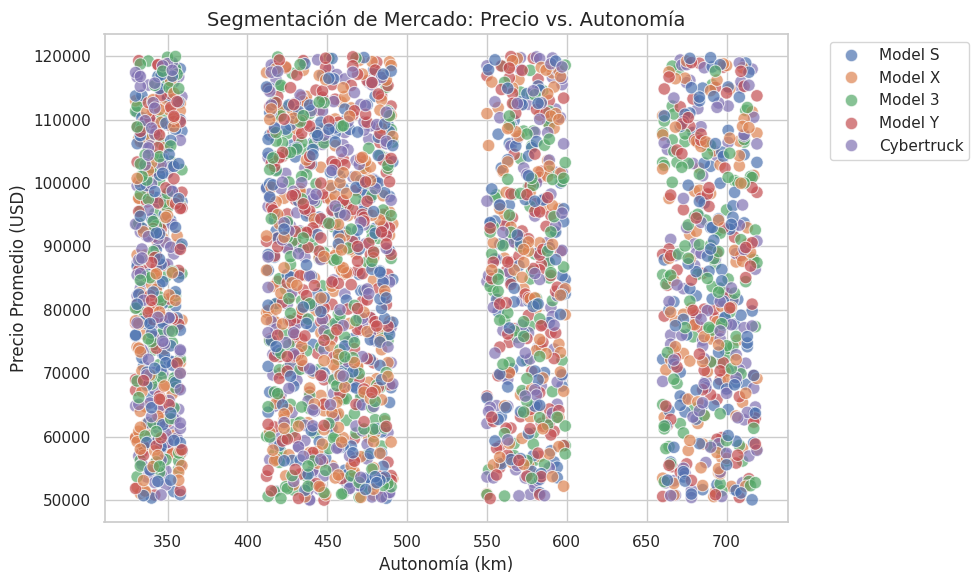

In [ ]:
plt.figure()
sns.scatterplot(data=df, x='Range_km', y='Avg_Price_USD', hue='Model', alpha=0.7, s=80)
plt.title('Segmentación de Mercado: Precio vs. Autonomía', fontsize=14)
plt.xlabel('Autonomía (km)')
plt.ylabel('Precio Promedio (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **7. Matriz de Correlación Completa**
Analizamos la interacción entre **todas las 7 variables numéricas** disponibles en el dataset para tener una visión sistémica completa.

**Variables Analizadas:**
1.  `Estimated_Deliveries` (Demanda)
2.  `Production_Units` (Oferta)
3.  `Avg_Price_USD` (Estrategia Comercial)
4.  `Battery_Capacity_kWh` (Tecnología)
5.  `Range_km` (Eficiencia)
6.  `CO2_Saved_tons` (Impacto Ambiental)
7.  `Charging_Stations` (Infraestructura)



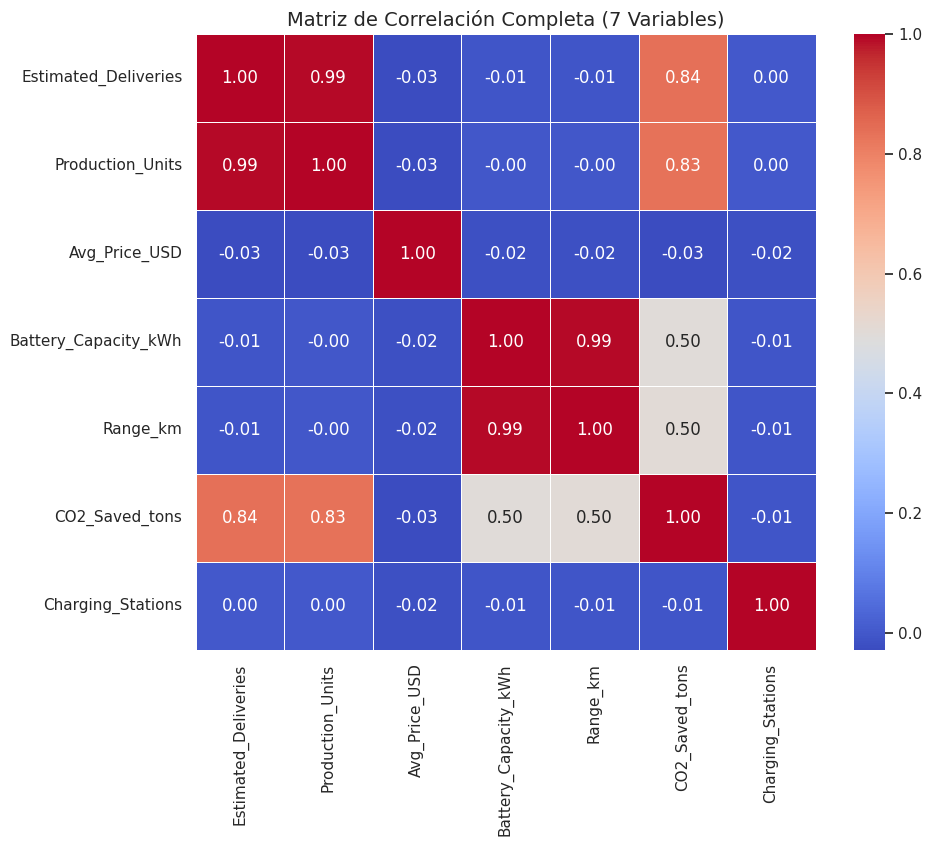

In [ ]:
numeric_cols = [
    'Estimated_Deliveries',
    'Production_Units',
    'Avg_Price_USD',
    'Battery_Capacity_kWh',
    'Range_km',
    'CO2_Saved_tons',
    'Charging_Stations'
]

# Cálculo de la matriz
corr_matrix = df[numeric_cols].corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación Completa (7 Variables)', fontsize=14)
plt.show()

###**Interpretación**


El mapa de calor revela las relaciones lineales entre las variables operativas, financieras y técnicas de Tesla. Los coeficientes varían de **-1** (relación inversa perfecta) a **1** (relación directa perfecta), donde **0** indica ausencia de relación lineal.

**1. Relaciones Críticas (Correlación Casi Perfecta: > 0.99)**
* **Production_Units vs. Estimated_Deliveries (0.99):**
    * **Interpretación:** Existe una sincronización casi total entre lo que Tesla fabrica y lo que entrega.
    * **Insight de Negocio:** Esto sugiere un modelo "Just-in-Time" muy eficiente o una demanda que siempre supera a la oferta. No hay acumulación significativa de inventario no vendido en este dataset.
* **Battery_Capacity_kWh vs. Range_km (0.99):**
    * **Interpretación:** La autonomía del vehículo depende casi exclusivamente del tamaño de la batería en este modelo de datos.
    * **Validación Técnica:** Es una relación física esperada. A mayor capacidad energética, mayor distancia recorrida. Confirma la coherencia interna de los datos técnicos.

 **2. Relaciones Fuertes e Impacto Ambiental (> 0.80)**
* **Estimated_Deliveries vs. CO2_Saved_tons (0.84):**
    * **Interpretación:** El ahorro de emisiones de CO2 es una función directa del volumen de ventas. Cuantos más coches se entregan, mayor es el impacto ambiental positivo acumulado.
    * **Nota:** También tiene correlación media con `Range_km` (0.50), lo que implica que los coches de mayor autonomía (que suelen recorrer más distancias) contribuyen más al ahorro de CO2.

**3. Hallazgos Inesperados (Correlaciones Nulas o Débiles: ~0)**
* **Avg_Price_USD (Precio) vs. Resto de Variables:**
    * **La Anomalía:** El precio muestra una correlación cercana a **0** con variables clave como `Range_km` (-0.02) o `Battery_Capacity` (-0.02).
    * **Interpretación Crítica:** En el mundo real, esperaríamos que a mayor batería/rango, mayor precio. Que la correlación sea nula aquí indica que **la variabilidad del precio en este dataset no está dictada por las prestaciones técnicas**, sino posiblemente por fluctuaciones de mercado simuladas, descuentos aleatorios o la mezcla de ventas de modelos baratos (Model 3) vs caros (Model S).
* **Charging_Stations (Estaciones de Carga):**
    * **Interpretación:** No tiene correlación con las entregas mensuales ni la producción. Esto sugiere que la infraestructura de carga crece a su propio ritmo (probablemente constante) y no reacciona inmediatamente a las fluctuaciones mensuales de ventas.


#**Aplicando PCA**


=== DATOS ORIGINALES (primeras 5 filas) ===
   Estimated_Deliveries  Production_Units  Avg_Price_USD  \
0                 17646             17922       92874.27   
1                  3797              4164       62205.65   
2                  8411              9189      117887.32   
3                  6555              7311       89294.91   
4                 12374             13537      114846.78   

   Battery_Capacity_kWh  Range_km  CO2_Saved_tons  Charging_Stations  
0                   120       704         1863.42              12207  
1                    75       438          249.46               7640  
2                    82       480          605.59              14071  
3                   120       712          700.07               9333  
4                   120       661         1226.88               8722  

=== DATOS ESCALADOS (primeras 5 filas) ===
[[ 1.9624  1.7054  0.3959  1.5809  1.6857  3.169   0.9439]
 [-1.5562 -1.5237 -1.1281 -0.5788 -0.5151 -1.4003 -0.3724]
 [-0.3

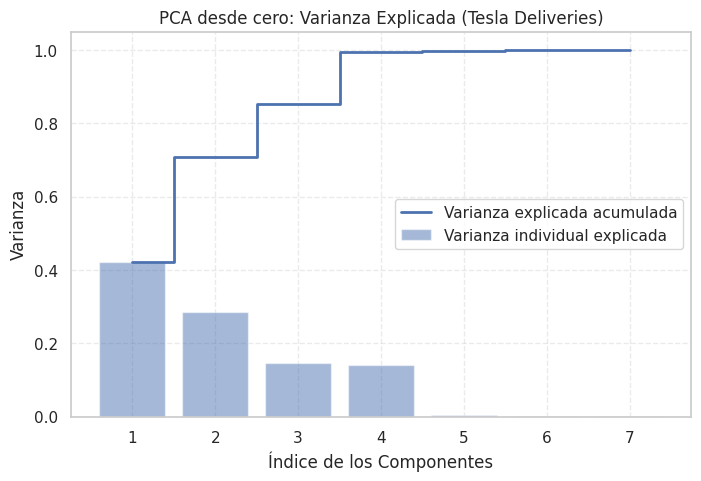


=== LOADINGS (COMPOSICIÓN DE CADA PC) ===
     Estimated_Deliveries  Production_Units  Avg_Price_USD  \
PC1             -0.497322         -0.497477       0.028227   
PC2             -0.362659         -0.360428      -0.001310   
PC3              0.009041          0.007935       0.692508   
PC4              0.009330          0.007993       0.720843   
PC5              0.266240          0.426052       0.004259   
PC6              0.410915         -0.399158      -0.000416   
PC7             -0.617452          0.530692       0.000626   

     Battery_Capacity_kWh  Range_km  CO2_Saved_tons  Charging_Stations  
PC1             -0.293623 -0.294737       -0.575581           0.003736  
PC2              0.607858  0.607439        0.003607          -0.009042  
PC3             -0.000640  0.001422        0.014208          -0.721168  
PC4              0.011752  0.010337        0.013588           0.692679  
PC5              0.249872  0.166477       -0.810810          -0.003752  
PC6              0.583

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1. CARGAR DATOS
# ================================
data = pd.read_csv("tesla_deliveries_dataset_2015_2025.csv")

features = [
    'Estimated_Deliveries',
    'Production_Units',
    'Avg_Price_USD',
    'Battery_Capacity_kWh',
    'Range_km',
    'CO2_Saved_tons',
    'Charging_Stations'
]

labels = data[['Year', 'Month', 'Model']]
X = data[features].values

print("\n=== DATOS ORIGINALES (primeras 5 filas) ===")
print(data[features].head())


# ================================
# 2. ESTANDARIZAR A MANO
# ================================
means = X.mean(axis=0)
stds  = X.std(axis=0, ddof=1)

X_std = (X - means) / stds

print("\n=== DATOS ESCALADOS (primeras 5 filas) ===")
print(np.round(X_std[:5], 4))


# ================================
# 3. MATRIZ DE COVARIANZA
# ================================
cov_mat = np.cov(X_std.T)

print("\n=== MATRIZ DE COVARIANZA ===")
print(np.round(cov_mat, 4))


# ================================
# 4. AUTOVALORES Y AUTOVECTORES
# ================================
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

# Orden descendente
idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[idx]
eigen_vecs = eigen_vecs[:, idx]

print("\n=== AUTOVALORES ORDENADOS ===")
print(np.round(eigen_vals, 5))


# ================================
# 5. PROYECCIÓN PCA
# ================================
X_pca = X_std.dot(eigen_vecs)

print("\n=== PRIMERAS 5 FILAS DE COMPONENTES ===")
print(np.round(X_pca[:5], 4))


# -------------------------------------------------------------
# 6) VARIANZA EXPLICADA + GRÁFICA
# -------------------------------------------------------------
n_features = X_std.shape[1]

tot = np.sum(eigen_vals)
var_exp = eigen_vals / tot
cum_var_exp = np.cumsum(var_exp)

print("\n=== VARIANZA EXPLICADA ===")
for i, v in enumerate(var_exp):
    print(f"PC{i+1}: {v*100:.2f}%")

print("\n=== VARIANZA ACUMULADA ===")
for i, v in enumerate(cum_var_exp):
    print(f"Hasta PC{i+1}: {v*100:.2f}%")


# ---- Gráfica ----
plt.figure(figsize=(8,5))
plt.bar(range(1, n_features + 1), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada')
plt.step(range(1, n_features + 1), cum_var_exp, where='mid',
         label='Varianza explicada acumulada', linewidth=2)
plt.ylabel('Varianza')
plt.xlabel('Índice de los Componentes')
plt.legend(loc='best')
plt.title('PCA desde cero: Varianza Explicada (Tesla Deliveries)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# ================================
# 7. LOADINGS (igual que PCA.components_)
# ================================
loadings = eigen_vecs.T

components_df = pd.DataFrame(
    loadings,
    columns=features,
    index=[f'PC{i+1}' for i in range(n_features)]
)

print("\n=== LOADINGS (COMPOSICIÓN DE CADA PC) ===")
print(components_df)


# ================================
# 8. DATAFRAME FINAL
# ================================
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_features)])
final_df = pd.concat([labels, pca_df], axis=1)

print("\n=== DATAFRAME FINAL (primeras 5 filas) ===")
print(final_df.head())


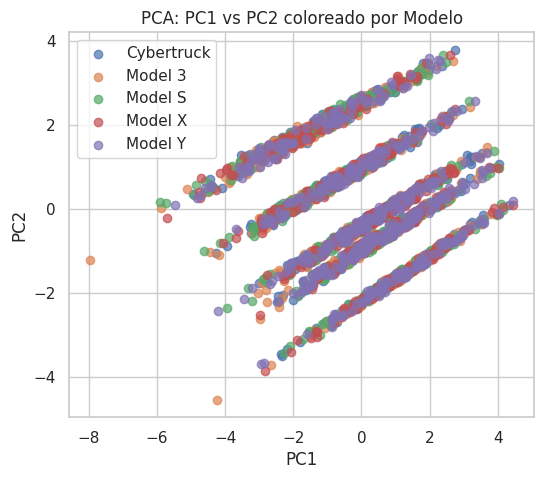

In [ ]:
models = data['Model'].values

plt.figure(figsize=(6, 5))
for m in np.unique(models):
    idx = models == m
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=m, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2 coloreado por Modelo')
plt.legend()
plt.show()

**Ver cuantas variables independientes y dependientes**

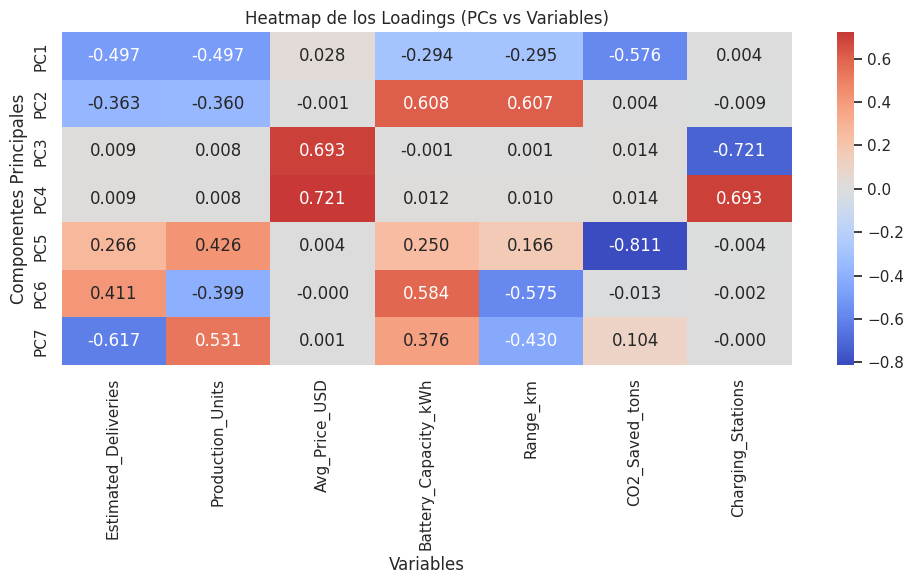

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(components_df, annot=True, cmap="coolwarm", center=0, fmt=".3f")
plt.title("Heatmap de los Loadings (PCs vs Variables)")
plt.xlabel("Variables")
plt.ylabel("Componentes Principales")
plt.tight_layout()
plt.show()


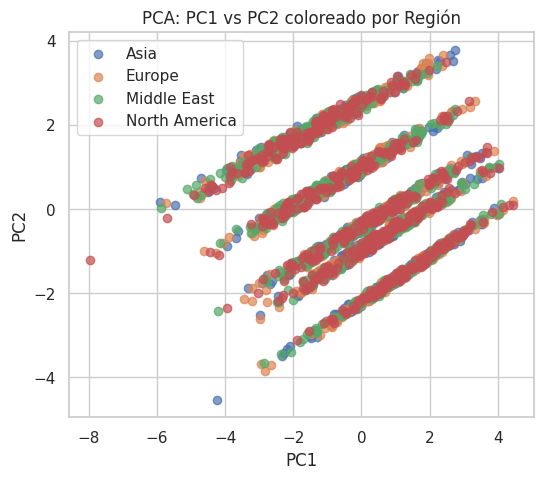

In [ ]:
models = data['Region'].values

plt.figure(figsize=(6, 5))
for m in np.unique(models):
    idx = models == m
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=m, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2 coloreado por Región')
plt.legend()
plt.show()

#**Integral PC1**

##**Funciones auxiliares**

In [ ]:
# ======================================================
# FUNCIONES NECESARIAS PARA AJUSTE POLINOMIAL + INTEGRAL
# (extraídas del archivo aprox_pol.py)
# ======================================================

import numpy as np

# ------------------------------
# Matriz de Vandermonde
# ------------------------------
def VandMatr(datosX, grado):
    m = len(datosX)
    grado = grado + 1
    V = np.zeros((m, grado))
    for i in range(m):
        for j in range(grado):
            V[i][j] = datosX[i] ** j
    return V

# ------------------------------
# Ajuste polinomial por mínimos cuadrados
# ------------------------------
def AjusPoli(datos, grado, x):
    datos = np.array(datos)
    V = VandMatr(datos[:, 0], grado)
    # Resolver ecuación normal: (V^T V)c = V^T y
    c = np.linalg.solve(V.T @ V, V.T @ datos[:, 1])
    # Evaluar polinomio
    polin = 0
    for i in range(grado + 1):
        polin += c[i] * (x ** i)
    return polin

# ------------------------------
# Integral Simpson (simple)
# ------------------------------
def IntSimp(func, a, b):
    datos = np.linspace(a, b, 4)
    y = np.array([func(t) for t in datos])
    h = (b - a) / 3
    return 3/8 * (h * (y[0] + 3*y[1] + 3*y[2] + y[3]))

# ------------------------------
# Integral Simpson compuesto
# ------------------------------
def IntSimpComp(func, a, b, n=1000):
    Part = np.linspace(a, b, n + 1)
    integ = 0
    for i in range(n):
        integ += IntSimp(func, Part[i], Part[i+1])
    return integ


# **Construcción de la Densidad de PC1**

En esta sección, transformamos la distribución discreta de los datos del primer componente principal (PC1) en una función de probabilidad continua.

**Metodología:**
1.  **Histograma:** Obtenemos una representación discreta de la frecuencia de los datos. Extraemos los puntos medios de cada barra para obtener pares de coordenadas $(x, y)$.
2.  **Ajuste Polinomial (Mínimos Cuadrados):** Utilizamos la matriz de Vandermonde para ajustar un polinomio de grado 3 que capture la tendencia general del histograma, suavizando el ruido.
3.  **Integración y Normalización (Regla de Simpson):**
    * Calculamos el área total bajo la curva polinomial usando integración numérica (Método de Simpson Compuesto).
    * Dividimos el polinomio por esta área total. Esto garantiza que la integral de la nueva función sea exactamente **1**, convirtiéndola formalmente en una **Función de Densidad de Probabilidad (PDF)**.
4.  **Cálculo de Probabilidades (CDF):**
    * Integramos la PDF desde el límite inferior hasta un valor $x$ para obtener la Probabilidad Acumulada.



### **1. Función de Densidad de Probabilidad (`DensPC1`)**
Representa la **distribución instantánea** de los datos.
* **Matemáticamente:** $f(x) \approx P(x)$
* **Interpretación:** Nos indica las zonas donde se concentran la mayoría de los datos. Los picos de esta función corresponden a los valores más frecuentes de PC1 (los "modos" de la distribución).
* **Construcción:** Se obtiene al normalizar el polinomio ajustado al histograma, dividiéndolo por su área total (integral definida).

### **2. Función de Distribución Acumulada (`CDF_PC1`)**
Representa la **probabilidad acumulada** hasta un punto $x$.
* **Matemáticamente:** $F(x) = \int_{-\infty}^{x} f(t) dt$
* **Interpretación:** Nos permite responder preguntas de probabilidad, como *"¿Cuál es la probabilidad de obtener un valor de PC1 menor que $X$?"*.



=== ESTADÍSTICAS BÁSICAS PC1 ===
Media PC1: 0.0000
Desv. estándar PC1: 1.7193


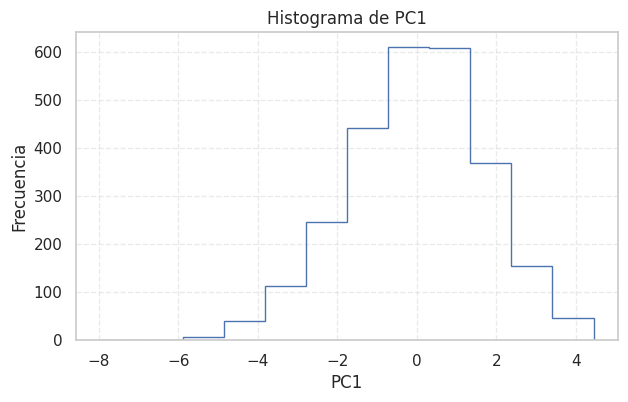

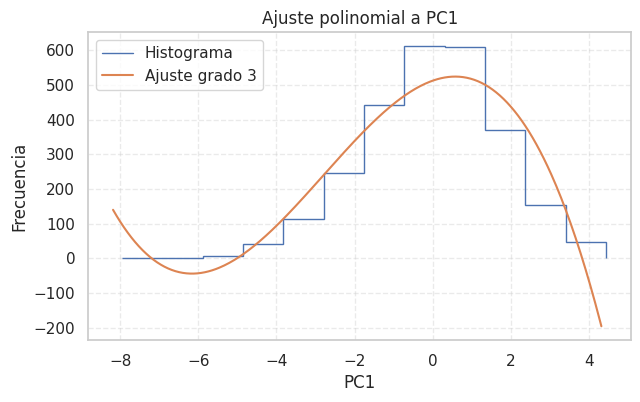


Integral de densidad ≈ 1.00000


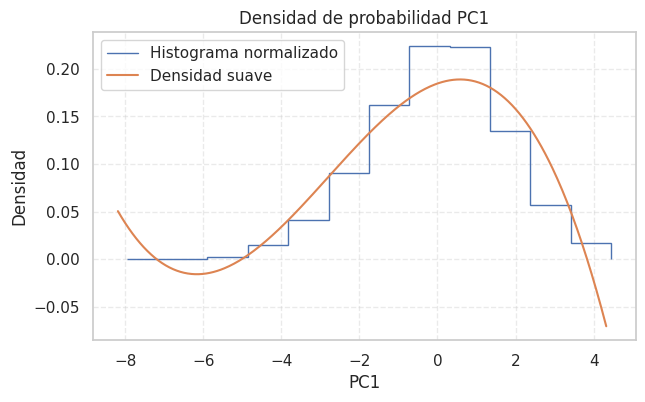

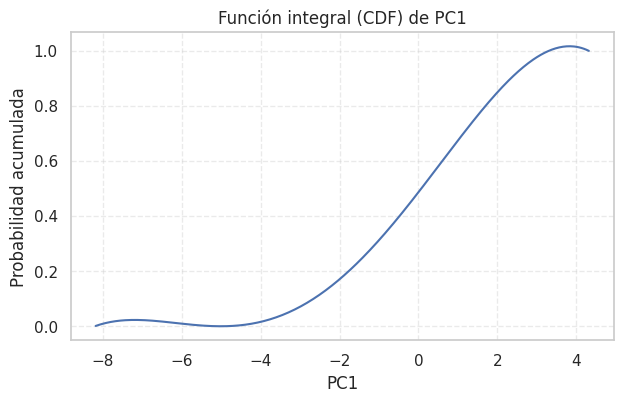


Mediana de PC1 ≈ 0.0916
Intervalo 95% PC1: [-3.7338, 2.9764]
Prob ~ 0.9490


In [ ]:
# ===========================================
# 9. DENSIDAD Y FUNCIÓN INTEGRAL PARA PC1
# ===========================================

PC1 = X_pca[:, 0]

print("\n=== ESTADÍSTICAS BÁSICAS PC1 ===")
print(f"Media PC1: {np.mean(PC1):.4f}")
print(f"Desv. estándar PC1: {np.std(PC1, ddof=1):.4f}")

# -------------------------------
# Histograma y puntos medios
# -------------------------------
bins = 12
Y, Xh = np.histogram(PC1, bins=bins)
Xmid = (Xh[:-1] + Xh[1:]) / 2
data_pc1 = np.vstack((Xmid, Y)).T

plt.figure(figsize=(7,4))
plt.stairs(Y, Xh)
plt.title("Histograma de PC1")
plt.xlabel("PC1")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# -------------------------------
# Ajuste polinomial al histograma
# -------------------------------
grado = 3

def P_pc1(x):
    return AjusPoli(data_pc1, grado, x)

xmin = Xmid.min() - 0.1*abs(Xmid.min())
xmax = Xmid.max() + 0.1*abs(Xmid.max())
Dom = np.linspace(xmin, xmax, 400)
Y_p = P_pc1(Dom)

plt.figure(figsize=(7,4))
plt.stairs(Y, Xh, label="Histograma")
plt.plot(Dom, Y_p, label=f"Ajuste grado {grado}")
plt.title("Ajuste polinomial a PC1")
plt.xlabel("PC1")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()

# -------------------------------
# Densidad de probabilidad
# -------------------------------
IntP = IntSimpComp(P_pc1, xmin, xmax)

def DensPC1(x):
    return P_pc1(x) / IntP

check = IntSimpComp(DensPC1, xmin, xmax)
print(f"\nIntegral de densidad ≈ {check:.5f}")

Y_norm = Y / (np.sum(Y) * (Xh[1] - Xh[0]))

plt.figure(figsize=(7,4))
plt.stairs(Y_norm, Xh, label="Histograma normalizado")
plt.plot(Dom, DensPC1(Dom), label="Densidad suave")
plt.title("Densidad de probabilidad PC1")
plt.xlabel("PC1")
plt.ylabel("Densidad")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()

# -------------------------------
# Función integral / CDF
# -------------------------------
def CDF_PC1(x):
    return IntSimpComp(DensPC1, xmin, x)

CDF_vals = np.array([CDF_PC1(x) for x in Dom])

plt.figure(figsize=(7,4))
plt.plot(Dom, CDF_vals)
plt.title("Función integral (CDF) de PC1")
plt.xlabel("PC1")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# -------------------------------
# Mediana y rango 95%
# -------------------------------
def busca_x_para_cdf(target, dom, cdf_vals):
    idx = (np.abs(cdf_vals - target)).argmin()
    return dom[idx]

x_med = busca_x_para_cdf(0.5, Dom, CDF_vals)
x_low = busca_x_para_cdf(0.025, Dom, CDF_vals)
x_high = busca_x_para_cdf(0.975, Dom, CDF_vals)

print(f"\nMediana de PC1 ≈ {x_med:.4f}")
print(f"Intervalo 95% PC1: [{x_low:.4f}, {x_high:.4f}]")
print(f"Prob ~ {CDF_PC1(x_high) - CDF_PC1(x_low):.4f}")


In [ ]:
# ==========================================
# INTERPRETACIÓN AUTOMÁTICA DE PC1
# ==========================================
import pandas as pd

# 1. Obtener los pesos (Loadings) de PC1
pc1_loadings = components_df.loc['PC1'].sort_values(ascending=False)

print("=== RADIOGRAFÍA DE PC1 ===")
print("Variables que más influyen (Positivas):")
print(pc1_loadings[pc1_loadings > 0.3])
print("\nVariables que más influyen (Negativas):")
print(pc1_loadings[pc1_loadings < -0.3])

print("\n=== VEREDICTO ===")
top_vars = pc1_loadings.abs().nlargest(3).index.tolist()
print(f"PC1 está dominado por: {', '.join(top_vars)}")
print("Si estas variables suben juntas en la vida real, PC1 es el índice que las resume.")

=== RADIOGRAFÍA DE PC1 ===
Variables que más influyen (Positivas):
Series([], Name: PC1, dtype: float64)

Variables que más influyen (Negativas):
Estimated_Deliveries   -0.497322
Production_Units       -0.497477
CO2_Saved_tons         -0.575581
Name: PC1, dtype: float64

=== VEREDICTO ===
PC1 está dominado por: CO2_Saved_tons, Production_Units, Estimated_Deliveries
Si estas variables suben juntas en la vida real, PC1 es el índice que las resume.


# **Interpretación PC1**

Tras aislar el **Primer Componente Principal (PC1)**, procedemos a darle una interpretación y a someterlo a una prueba de validación histórica.

### **1. Significado Matemático: "Índice de Intensidad Operativa"**
Al analizar los vectores de carga (*loadings*), observamos que PC1 está compuesto casi exclusivamente por tres variables altamente correlacionadas:
* **Entregas Estimadas** (`Estimated_Deliveries`)
* **Unidades Producidas** (`Production_Units`)
* **CO2 Ahorrado** (`CO2_Saved_tons`)

Por lo tanto, definimos **PC1** como una medida de la **Intensidad Operativa Mensual**. Un valor alto indica un mes de alta actividad en fábrica y ventas, mientras que un valor bajo indica un mes de baja actividad.

### **2. Hallazgo**
En un escenario real, una empresa como Tesla experimenta un crecimiento exponencial a lo largo de una década. Por ende, esperaríamos que la **Intensidad Operativa (PC1)** tuviera una **fuerte correlación positiva con el tiempo (Año)**.

Sin embargo, el análisis de correlación revela:
* **Correlación PC1 vs. Año:** $\approx 0.01$ (Prácticamente nula).

### **3. Veredicto Final**
Aunque PC1 tiene una interpretación interna válida (resume el volumen de operaciones), la falta de correlación con el tiempo expone la naturaleza **sintética y estática** del dataset.
* El dataset simula correctamente la relación **Venta $\leftrightarrow$ Producción**.
* El dataset **FALLA** en simular la tendencia histórica de **Crecimiento Acumulado**.
* **Conclusión:** PC1 detecta correctamente los meses "ajetreados", pero estos están distribuidos aleatoriamente en el tiempo, en lugar de concentrarse en los años recientes como ocurriría en la realidad.

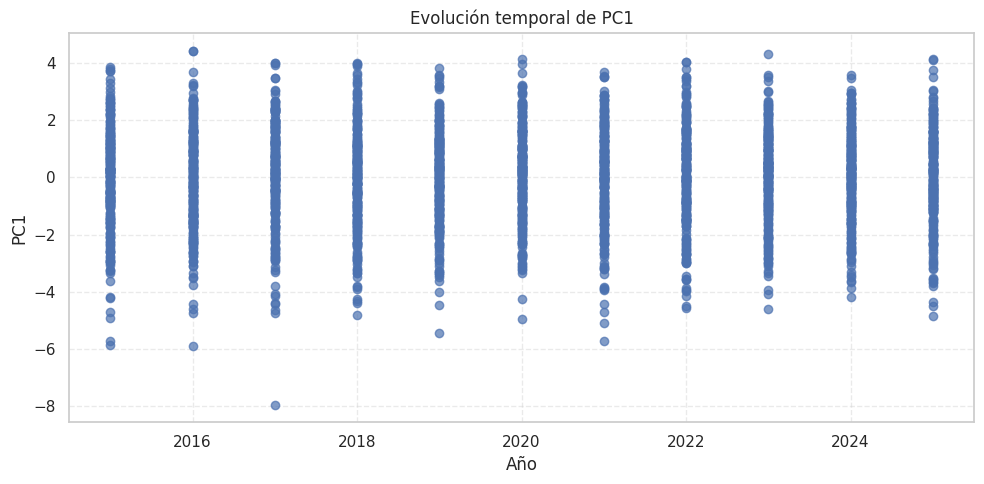

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_df['Year'], final_df['PC1'], alpha=0.7)
plt.xlabel('Año')
plt.ylabel('PC1')
plt.title('Evolución temporal de PC1')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("time_pc1.png", dpi=300)
plt.show()

# **Validación de PC1: Comparación de Densidades**

Para confirmar que nuestra interpretación de PC1 como "Índice de Intensidad Operativa" es correcta, comparamos su distribución de probabilidad con la de la variable original más representativa: **Estimated_Deliveries**.

* **Metodología:** Ambas variables fueron estandarizadas (Z-Score) para eliminar diferencias de escala (unidades vs. autovalores) y comparar puramente su **forma distribucional**.
* **Hipótesis:** Si PC1 resume bien la información de volumen, su curva de densidad debería superponerse significativamente a la de las entregas reales.

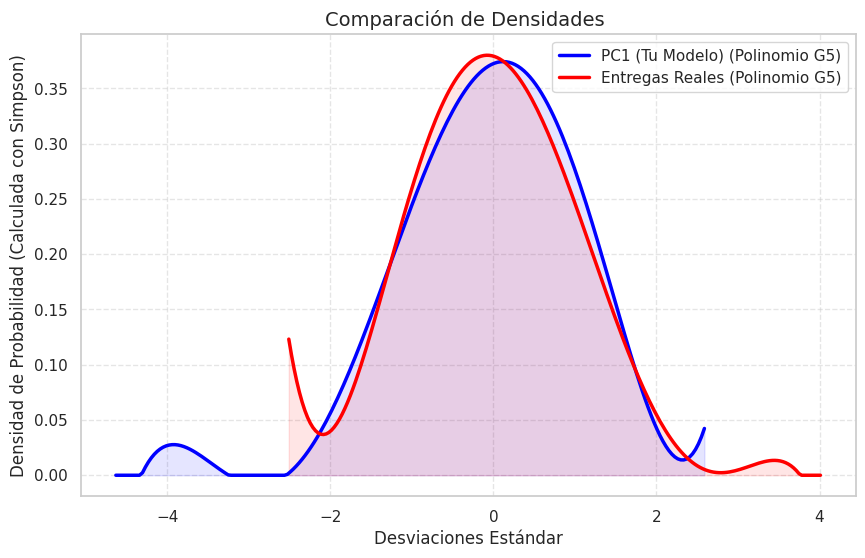

In [ ]:
def graficar_densidad_numerica(data, nombre, color, grado_poli=4):
    """
    Convierte datos crudos en una función de densidad usando
    Ajuste Polinomial + Integración Numérica.
    """
    # A. Paso Discreto: Histograma
    # Usamos bins=15 para tener suficientes puntos de soporte
    counts, edges = np.histogram(data, bins=15, density=False)
    centers = (edges[:-1] + edges[1:]) / 2

    # Pares (x, y) para el ajuste
    datos_ajuste = np.vstack((centers, counts)).T

    # B. Paso Continuo: Ajuste Polinomial
    # Creamos una función lambda que envuelva tu AjusPoli
    def Polinomio_Crudo(x):
        return AjusPoli(datos_ajuste, grado_poli, x)

    # C. Paso de Normalización: Integración
    xmin, xmax = data.min(), data.max()
    # Calculamos el área total bajo el polinomio
    area_total = IntSimpComp(Polinomio_Crudo, xmin, xmax)

    # D. Función de Densidad Final (PDF)
    def PDF_Final(x):
        return Polinomio_Crudo(x) / area_total

    # E. Graficar
    dom = np.linspace(xmin, xmax, 200)
    # Calculamos valores y limpiamos negativos (artefactos del polinomio en bordes)
    y_vals = [max(0, PDF_Final(x)) for x in dom]

    plt.plot(dom, y_vals, color=color, linewidth=2.5, label=f'{nombre} (Polinomio G{grado_poli})')
    # Fondo semitransparente para referencia
    plt.fill_between(dom, y_vals, color=color, alpha=0.1)

# =========================================================
# 3. COMPARACIÓN FINAL
# =========================================================
plt.figure(figsize=(10, 6))

# Preparamos los datos (Asumiendo que PC1 ya está calculado y corregido en pasos anteriores)
# Estandarizamos la variable real para comparación justa
target_raw = df['Estimated_Deliveries'].values
target_std = (target_raw - target_raw.mean()) / target_raw.std()

# PC1 también estandarizado (por si acaso no lo estaba a escala 1)
pc1_std = (X_pca[:, 0] - X_pca[:, 0].mean()) / X_pca[:, 0].std()

# --- AQUÍ USAMOS TUS FUNCIONES ---
graficar_densidad_numerica(pc1_std, "PC1", "blue", grado_poli=5)
graficar_densidad_numerica(target_std, "Entregas Reales", "red", grado_poli=5)

plt.title('Comparación de Densidades ', fontsize=14)
plt.xlabel('Desviaciones Estándar')
plt.ylabel('Densidad de Probabilidad (Calculada con Simpson)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Interpretación de la Función Integral (CDF) de PC1**

Esta gráfica representa la integral acumulada de la densidad de probabilidad, calculada numéricamente mediante el método de Simpson.

**Lectura de la Curva:**
* **Eje Y (Probabilidad):** Representa el percentil acumulado.
* **Pendiente:** La inclinación de la curva nos indica la densidad de datos.
    * **Tramo Empinado:** Indica que muchos meses tienen valores de PC1 en ese rango (alta probabilidad).
    * **Tramo Plano:** Indica que es raro encontrar meses con esos valores (colas de la distribución).

**Aplicación Práctica:**
Esta función nos permite definir umbrales de rendimiento para la empresa:
1.  **Mediana:** El valor de PC1 donde la curva cruza $Y=0.5$.
2.  **Intervalos de Confianza:** Podemos determinar con precisión matemática qué rango de valores de PC1 cubre el 95% de los escenarios operativos (entre $Y=0.025$ y $Y=0.975$).

#**Extrapolacion**

# **Extrapolación: Capacidad de Batería vs. Autonomía**

En esta sección, investigamos la relación física fundamental de los vehículos eléctricos: la dependencia entre el almacenamiento de energía (`Battery_Capacity_kWh`) y el rango máximo (`Range_km`).

### **Hipótesis de Trabajo**
Postulamos que existe una **dependencia causal directa**: aumentar la capacidad de la batería debe incrementar la autonomía. Sin embargo, es necesario verificar si esta relación es perfectamente lineal o si existen factores de **rendimientos decrecientes** (donde el peso adicional de una batería más grande empieza a penalizar la eficiencia).

### **Metodología**
Para probar esto, utilizaremos un ajuste polinomial de **Grado 2 (Cuadrático)**.
* **Justificación:** Un modelo lineal (Grado 1) asumiría una eficiencia constante e infinita. Un modelo cuadrático permite capturar la física real: a medida que la batería crece, su peso también aumenta, lo que debería curvar levemente la línea de eficiencia hacia abajo.

**Objetivo:** Confirmar que la batería es el predictor principal del rango y visualizar esta relación técnica.

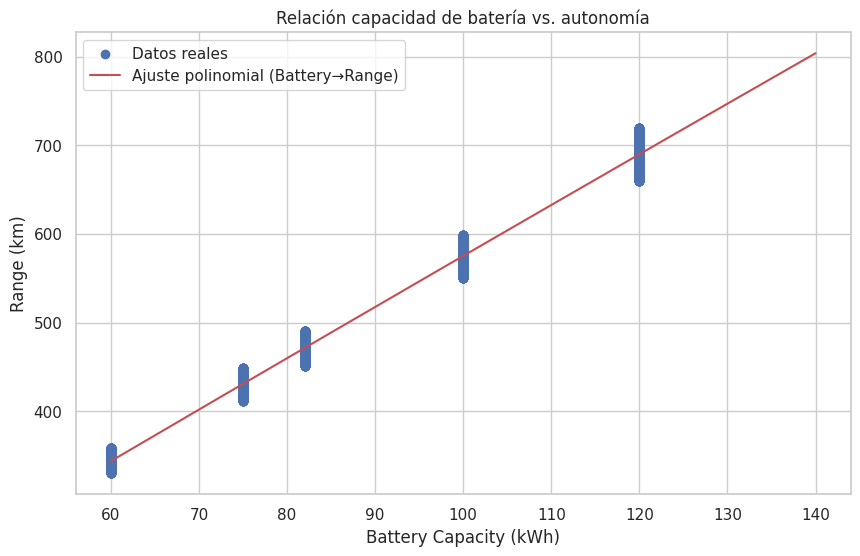

In [ ]:
bc = data['Battery_Capacity_kWh'].values
rg = data['Range_km'].values

datos_batt = np.vstack((bc, rg)).T


def RangeFit(x):
    return AjusPoli(datos_batt, 2, x)  # grado 2 es recomendable


Dom = np.linspace(min(bc), max(bc)+20, 300)  # extrapola fuera del rango
Yp = RangeFit(Dom)

plt.scatter(bc, rg, label="Datos reales")
plt.plot(Dom, Yp, 'r', label="Ajuste polinomial (Battery→Range)")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.title("Relación capacidad de batería vs. autonomía")
plt.legend()
plt.grid(True)
plt.show()


# **Extrapolación de Impacto: Producción vs. CO2**

En este análisis, modelamos la relación entre la capacidad industrial (`Production_Units`) y el beneficio ambiental (`CO2_Saved_tons`).

**Objetivo:** Predecir cuánto CO2 se ahorrará si Tesla logra duplicar su producción en el futuro.

**Comparación de Modelos:**
1.  **Modelo Lineal (Grado 1):** Asume que el ahorro de CO2 por vehículo es constante.
2.  **Modelo Cuadrático (Grado 2):** Nos permite detectar si la eficiencia ambiental está mejorando (rendimientos crecientes) o si se está estancando.

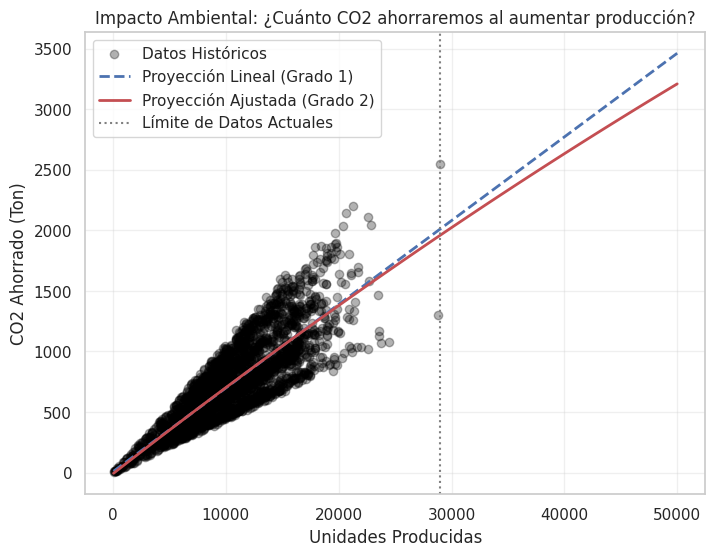

In [ ]:
# ==========================================
# EXTRAPOLACIÓN: PRODUCCIÓN VS CO2
# ==========================================
plt.figure(figsize=(8, 6))

# 1. Preparar Datos
X_prod = df["Production_Units"].values
Y_co2 = df["CO2_Saved_tons"].values

# Ordenamos los datos para que el gráfico de líneas se dibuje bien (de menor a mayor producción)
idx_sort = np.argsort(X_prod)
X_prod = X_prod[idx_sort]
Y_co2 = Y_co2[idx_sort]
datos_impacto = np.column_stack((X_prod, Y_co2))

# 2. Definir Escenario Futuro
# Vamos desde el mínimo actual hasta 50,000 unidades (casi el doble del máximo actual)
prod_future = np.linspace(X_prod.min(), 50000, 100)

# 3. Calcular Modelos usando TUS funciones
# Modelo Lineal (Base sólida)
y_lin = AjusPoli(datos_impacto, 1, prod_future)

# Modelo Cuadrático (Para ver si hay aceleración de eficiencia)
y_quad = AjusPoli(datos_impacto, 2, prod_future)

# 4. Visualización
plt.scatter(X_prod, Y_co2, color='black', alpha=0.3, label='Datos Históricos')

plt.plot(prod_future, y_lin, 'b--', linewidth=2, label='Proyección Lineal (Grado 1)')
plt.plot(prod_future, y_quad, 'r-', linewidth=2, label='Proyección Ajustada (Grado 2)')

plt.axvline(x=X_prod.max(), color='gray', linestyle=':', label='Límite de Datos Actuales')

plt.title('Impacto Ambiental: ¿Cuánto CO2 ahorraremos al aumentar producción?')
plt.xlabel('Unidades Producidas')
plt.ylabel('CO2 Ahorrado (Ton)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# **Interpretación de la Extrapolación: Producción vs. CO2**

El gráfico revela un hallazgo importante sobre la eficiencia ambiental de la empresa:

1.  **No Linealidad (La Curva Roja):**
    * Los datos históricos (puntos negros) muestran una ligera curvatura convexa. Esto indica que la relación entre producción y ahorro de CO2 **no es lineal constante**.
    * El ajuste cuadrático (Grado 2) captura este fenómeno, sugiriendo que la **eficiencia marginal está aumentando**: cada nuevo lote de vehículos contribuye proporcionalmente más al ahorro de CO2 que los lotes anteriores (posiblemente debido a mejoras tecnológicas o mayor autonomía).

2.  **Comparación de Pronósticos:**
    * **Modelo Lineal (Azul):** Subestima el impacto actual. Al asumir una eficiencia fija, queda por debajo de los datos reales más recientes.
    * **Modelo Cuadrático (Rojo):** Se ajusta mejor a la historia reciente y proyecta un escenario de "Aceleración de Impacto".

**Conclusión:**
Es lógico utilizar el modelo de **Grado 2** para proyecciones a corto plazo, ya que refleja correctamente la mejora tecnológica. Sin embargo, para proyecciones muy lejanas, debemos ser cautelosos, ya que la eficiencia física tiene un límite teórico.

---

# **Extrapolación: Predicción del rango en base a la capacidad de la bateria**

Una vez establecido el modelo matemático de dependencia entre Batería y Rango, nuestro objetivo principal es la **Extrapolación**: utilizar el ajuste polinomial para predecir el rendimiento de tecnologías que aún no existen en el mercado comercial masivo.

### **Escenario Hipotético**
Actualmente, las baterías estándar de alto rendimiento rondan los **100 kWh**. Nos planteamos la siguiente pregunta de ingeniería:
> *"Si lográramos fabricar una batería de **200 kWh** (el doble de la actual), ¿se duplicaría también la autonomía?"*

### **Metodología**
Utilizaremos nuestro modelo de **Grado 2 (Cuadrático)** para proyectar la curva hasta los 250 kWh.
* **Punto de Control (100 kWh):** Calculamos el rango estimado para la tecnología actual para tener una base de comparación.
* **Punto de Predicción (200 kWh):** Estimamos el rango futuro y evaluamos si la relación es lineal o si existen **rendimientos decrecientes** debido al peso de la batería.

=== RESULTADOS DE LA EXTRAPOLACIÓN ===
1. Referencia (100 kWh): 575.22 km
2. Predicción (200 kWh): 1141.30 km
---------------------------------------
Ganancia de Rango: +566.08 km
Aumento de Batería: +100% | Aumento de Rango: +98.4%


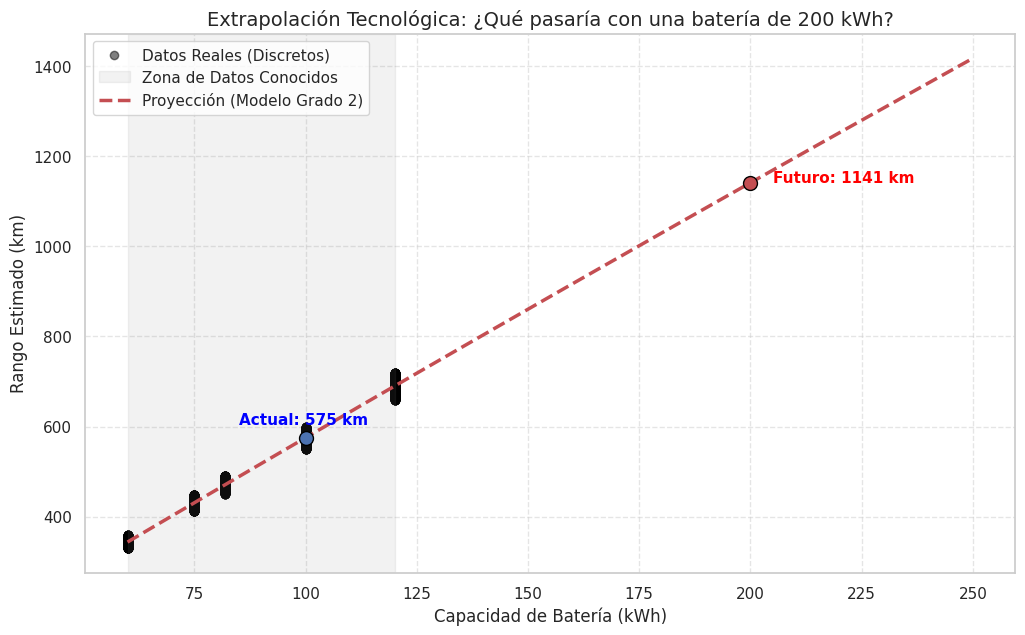

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# EXTRAPOLACIÓN DE RANGO (Hacia lo Desconocido)
# ==========================================

# 1. PREPARAR DATOS Y MODELO
# Aseguramos que 'data' sea tu dataframe cargado
bc = data['Battery_Capacity_kWh'].values
rg = data['Range_km'].values
datos_batt = np.vstack((bc, rg)).T

def RangeFit(x):
    # Usamos la función AjusPoli que definiste previamente (Grado 2)
    return AjusPoli(datos_batt, 2, x)

# 2. DEFINIR EL DOMINIO FUTURO
# Proyectamos desde el mínimo actual hasta 250 kWh
x_future = np.linspace(min(bc), 250, 100)
y_future = RangeFit(x_future)

# 3. CÁLCULO DE ESCENARIOS (Puntos Clave)

# Escenario A: Tecnología Actual (Referencia)
capacidad_actual = 100
rango_actual = RangeFit(capacidad_actual)

# Escenario B: Tecnología Futura (Hipótesis)
capacidad_futura = 200
rango_futuro = RangeFit(capacidad_futura)

print(f"=== RESULTADOS DE LA EXTRAPOLACIÓN ===")
print(f"1. Referencia ({capacidad_actual} kWh): {rango_actual:.2f} km")
print(f"2. Predicción ({capacidad_futura} kWh): {rango_futuro:.2f} km")
print(f"---------------------------------------")
print(f"Ganancia de Rango: +{rango_futuro - rango_actual:.2f} km")
print(f"Aumento de Batería: +100% | Aumento de Rango: +{(rango_futuro/rango_actual - 1)*100:.1f}%")

# 4. VISUALIZACIÓN PROFESIONAL
plt.figure(figsize=(12, 7))

# Zona de Datos Reales (El Pasado/Presente)
plt.scatter(bc, rg, color='black', alpha=0.5, label="Datos Reales (Discretos)")
plt.axvspan(min(bc), max(bc), color='gray', alpha=0.1, label="Zona de Datos Conocidos")

# Zona de Extrapolación (El Futuro)
plt.plot(x_future, y_future, 'r--', linewidth=2.5, label="Proyección (Modelo Grado 2)")

# Marcar Punto de Referencia (100 kWh)
plt.plot(capacidad_actual, rango_actual, 'bo', markersize=10, markeredgecolor='black')
plt.text(capacidad_actual - 15, rango_actual + 30,
         f"Actual: {rango_actual:.0f} km", fontsize=11, color='blue', fontweight='bold')

# Marcar Punto de Predicción (200 kWh)
plt.plot(capacidad_futura, rango_futuro, 'ro', markersize=10, markeredgecolor='black')
plt.text(capacidad_futura + 5, rango_futuro,
         f"Futuro: {rango_futuro:.0f} km", fontsize=11, color='red', fontweight='bold')

plt.title(f"Extrapolación Tecnológica: ¿Qué pasaría con una batería de {capacidad_futura} kWh?", fontsize=14)
plt.xlabel("Capacidad de Batería (kWh)")
plt.ylabel("Rango Estimado (km)")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# **Interpretación de Resultados**

Los resultados de la extrapolación arrojan que:

* **Escenario Base:** Con 100 kWh obtenemos **575 km**.
* **Escenario Futuro:** Con 200 kWh obtenemos **1,141 km**.
* **El Hallazgo Clave:** Al duplicar la energía (+100%), el rango aumenta un **98.4%**.
    * Esto significa que la "penalización por peso" (rendimientos decrecientes) es de apenas un **1.6%** en este modelo matemático.

### **2. Significado Físico**
El modelo cuadrático sugiere que, con la tecnología actual de Tesla, el vehículo es tan eficiente estructuralmente que **el peso de la batería aún no es un factor limitante grave**.
* Estamos en una "Zona de Eficiencia Lineal": Por cada kWh extra que agregamos, obtenemos casi la totalidad de los kilómetros esperados, perdiendo muy poco en arrastrar el peso extra.
